<a href="https://colab.research.google.com/github/huggoparcelly/learning-maps/blob/main/Learning_how_to_plot_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning how to plot maps

## Download shapefile

In [ ]:
!gdown 1pCa5Z-o9UI0A_t5hi6ZHN-cu66wIX1CC

Downloading...
From: https://drive.google.com/uc?id=1pCa5Z-o9UI0A_t5hi6ZHN-cu66wIX1CC
To: /content/District_boundary.zip
100% 2.43M/2.43M [00:00<00:00, 73.6MB/s]


## Descompact files

In [ ]:
import zipfile

with zipfile.ZipFile('District_boundary.zip', 'r') as zip_ref:
    zip_ref.extractall('District_boundary')

## Installing Shapefile Library


In [ ]:
!pip install pyshp

## Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

## Initializing Visualization Set

In [ ]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

## Opening The Vector Map

In [ ]:
#opening the vector map
shp_path = 'District_boundary/District_Boundary.shp'
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

## Number of different shapes which were imported by shp.reader

In [ ]:
len(sf.shapes())

33

## Vector with cities in the region of Rajasthan

In [ ]:
sf.records()

[Record #0: ['JAISALMER', 'RAJASTHAN', 508247, 38487.17, 1],
 Record #1: ['BARMER', 'RAJASTHAN', 1964835, 28550.95, 2],
 Record #2: ['JALOR', 'RAJASTHAN', 1448940, 10647.4, 3],
 Record #3: ['DUNGARPUR', 'RAJASTHAN', 1107643, 3770.78, 4],
 Record #4: ['JHALAWAR', 'RAJASTHAN', 1180323, 6315.27, 5],
 Record #5: ['BARAN', 'RAJASTHAN', 1021653, 6993.94, 6],
 Record #6: ['BUNDI', 'RAJASTHAN', 962620, 5776.48, 7],
 Record #7: ['TONK', 'RAJASTHAN', 1211547, 7190.38, 8],
 Record #8: ['BHILWARA', 'RAJASTHAN', 2013789, 10445.18, 9],
 Record #9: ['NAGAUR', 'RAJASTHAN', 2761447, 17805.1, 10],
 Record #10: ['JODHPUR', 'RAJASTHAN', 2876652, 22696.9, 11],
 Record #11: ['BIKANER', 'RAJASTHAN', 1902110, 30279.27, 12],
 Record #12: ['CHURU', 'RAJASTHAN', 1688266, 13844.05, 13],
 Record #13: ['JHUNJHUNUN', 'RAJASTHAN', 1913689, 5911.03, 14],
 Record #14: ['SIKAR', 'RAJASTHAN', 2283647, 7726.75, 15],
 Record #15: ['DHAULPUR', 'RAJASTHAN', 977771, 3040.33, 16],
 Record #16: ['HANUMANGARH', 'RAJASTHAN', 1518

## Converting Shapefile Data Into Pandas Dataframes

In [ ]:
def read_shapefile(sf):
  #fetching the headings from the shape file
  fields = [x[0] for x in sf.fields][1:]

  #fetching the records from the shape file
  records = [list(i) for i in sf.records()]
  shps = [s.points for s in sf.shapes()]

  #converting shapefile data into pandas dataframe
  df = pd.DataFrame(columns=fields, data=records)

  #assigning the coordinates
  df = df.assign(coords=shps)
  return df

In [ ]:
df = read_shapefile(sf)
df.shape

(33, 6)

## Head of the Dataframe

In [ ]:
df.head()

,DIST_NAME,STATE_NAME,POPULATION,AREA_SQ_KM,ID,coords
0,JAISALMER,RAJASTHAN,508247,38487.17,1,"[(157738.06250418897, 2935783.500131789), (157..."
1,BARMER,RAJASTHAN,1964835,28550.95,2,"[(157738.06250418897, 2935783.500131789), (157..."
2,JALOR,RAJASTHAN,1448940,10647.40,3,"[(277249.4687781143, 2855619.49987793), (27736..."
3,DUNGARPUR,RAJASTHAN,1107643,3770.78,4,"[(359076.6875831379, 2650354.999858649), (3591..."
4,JHALAWAR,RAJASTHAN,1180323,6315.27,5,"[(684142.7499112426, 2703277.749951222), (6841..."


## Plot specific shape with the help of matplotlib

- Plots the shape (polygon) based on the city’s coordinates and,
- calculates and return the medium point of that specific shape (x0, y0) -> used to define where to print the city name.

In [ ]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

## Setting The City Name To Plot Respective Map
- For plotting a specific shape we had to know the ID of the particular city

Shape #26: POLYGON

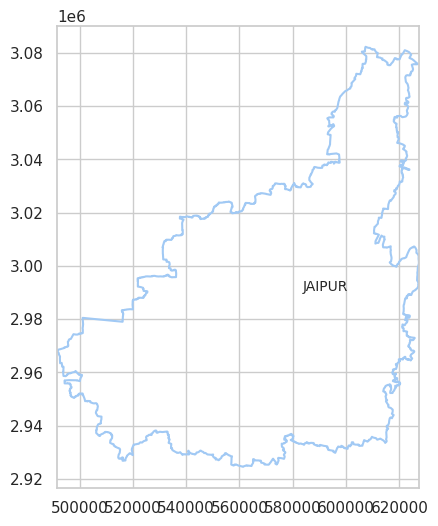

In [ ]:
DIST_NAME = 'JAIPUR'
#to get the id of the city map to be plotted
com_id = df[df.DIST_NAME == 'JAIPUR'].index.values[0]

plot_shape(com_id, DIST_NAME)
sf.shape(com_id)

## Plotting The Full Map
 - we can directly call it by its name
 - combines all the single shapes that were made using coordinates and show it as a combined shape

In [ ]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')

        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1

    if (x_lim != None) & (y_lim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)


## Ploting Map

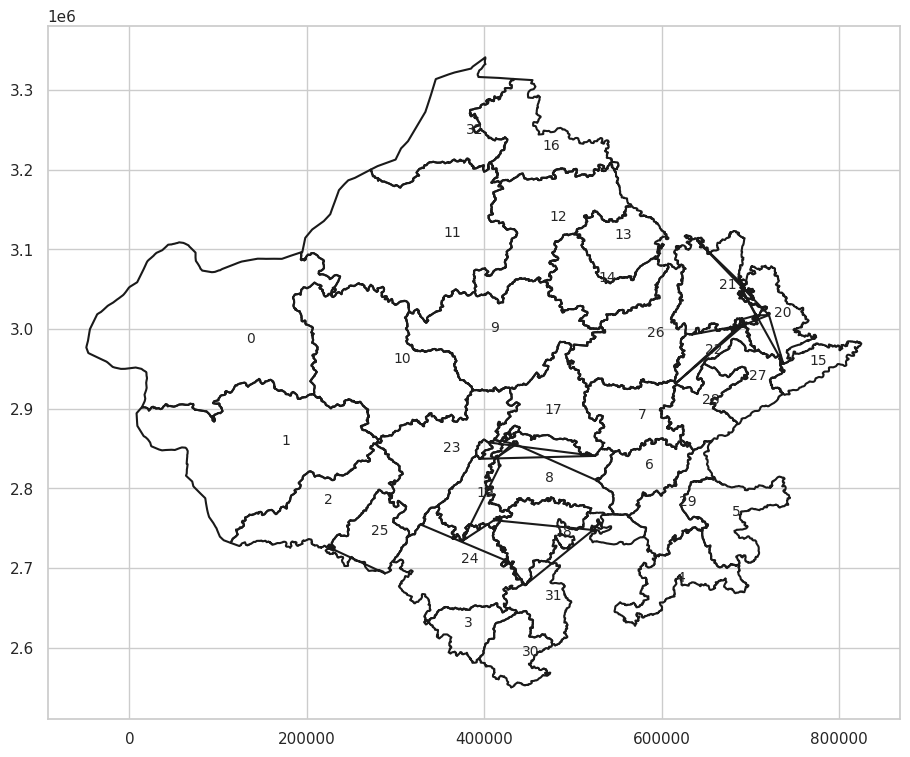

In [ ]:
#calling the function and passing required parameters to plot the full map
plot_map(sf)